# A Toy Model of Matrix-Weighted Networks:
# Rotation Matrix Version
### Hiroki Sayama
March 27, 2024

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
from itertools import combinations

In [24]:
n = 100 # number of nodes
p = 0.1 # probability of edges
k = 10  # size of matrix weights (k x k)

In [25]:
def plot_trajectory(v_history):
    plt.plot([x[1][0] for x in v_history], [x[1][1] for x in v_history], np.random.choice(list('kbrmgcy')) + 'o:', alpha = 0.3);
    plt.axis('image');

In [26]:
def random_rotation_matrix(k):
    A = np.eye(k)
    planes = list(combinations(range(k), 2))
    np.random.shuffle(planes)
    for i, j in planes:
        th = np.random.uniform(-np.pi, np.pi)
        R = np.eye(k)
        R[i, i] = np.cos(th)
        R[i, j] = -np.sin(th)
        R[j, i] = np.sin(th)
        R[j, j] = np.cos(th)
        A = R @ A
    return A

In [27]:
g = nx.erdos_renyi_graph(n, p)
for s, d in g.edges:
    g[s][d]['weight'] = random_rotation_matrix(k) # *rotation* matrix-based weight

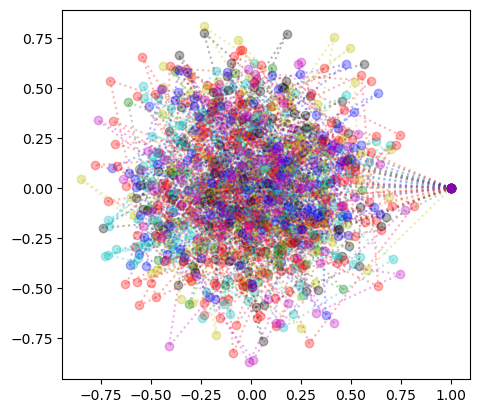

In [32]:
for j in range(30):

    # initialization
    vloc = np.random.choice(g.nodes)
    v = np.zeros(k)
    v[0] = 1.0
    v_history = [(vloc, v)]

    # random walk simulation
    for t in range(30):
        nvloc = np.random.choice(list(g.neighbors(vloc)))
        v = g[vloc][nvloc]['weight'] @ v    
        vloc = nvloc
        v_history.append((vloc, v))

    # plotting
    plot_trajectory(v_history)